In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:
data = np.load('model/data_pca_50_y_mean_.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
x = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4364, 50), (1092, 50), (4364,), (1092,))

# Training the Model :SVC

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC(C=1.0,kernel='rbf',gamma= 0.01,probability = True)
model.fit(x_train,y_train)
print('model trained successfuly')

model trained successfuly


In [7]:
model.score(x_train,y_train)

0.8595325389550871

In [8]:
model.score(x_test,y_test)

0.8003663003663004

# Model Evaluation

In [9]:
from sklearn import metrics

In [10]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [11]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 309,  131,  440],
       [  87,  565,  652],
       [ 396,  696, 1092]])

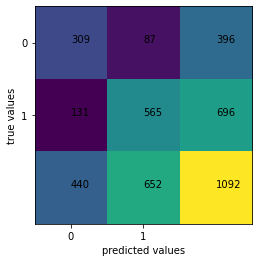

In [12]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [13]:
#classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.780303,0.702273,0.739234,440.000000
female,0.811782,0.866564,0.838279,652.000000
accuracy,0.800366,0.800366,0.800366,0.800366
macro avg,0.796042,0.784419,0.788757,1092.000000
weighted avg,0.799098,0.800366,0.798371,1092.000000


In [14]:
#kappa mode
metrics.cohen_kappa_score(y_test,y_pred)

0.5782379454035207

# ROC & AUC

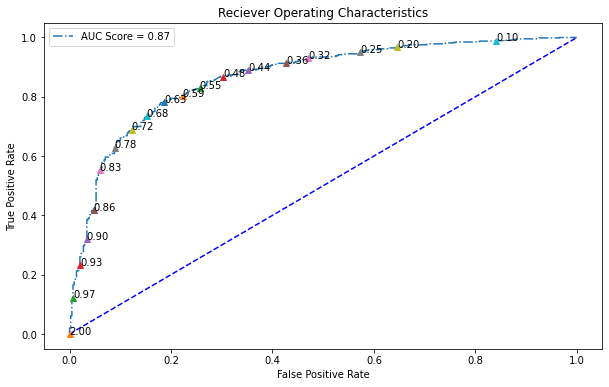

In [15]:
fpr ,tpr,thresh =  metrics.roc_curve(y_test,y_prob[:,1])#1 for plotting probabilities of female
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize =(10,6))
plt.plot(fpr,tpr ,'-.')
plt.plot([0,1],[0,1],'b--')

for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title('Reciever Operating Characteristics')
plt.show()

# Hyper Parameter Tuning 

In [16]:
model_tune= SVC()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'C':[1,10,20,40,50,100],
               'kernel':['rbf','poly'],
              'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
              'coef0':[0,1]
             }
            

In [19]:
model_grid = GridSearchCV(model_tune,param_grid = param_grid,scoring = 'accuracy',cv =5,verbose=1)

In [20]:
model_grid.fit(x,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 40, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [21]:
model_grid.best_params_

{'C': 10, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [22]:
model_grid.best_score_

0.7884894054921553

In [43]:
#Building model with best parameter
model_best = SVC(C= 10,kernel ='rbf',gamma=0.005 , probability = True)
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.8168498168498168

In [44]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)

In [45]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 309,  131,  440],
       [  87,  565,  652],
       [ 396,  696, 1092]])

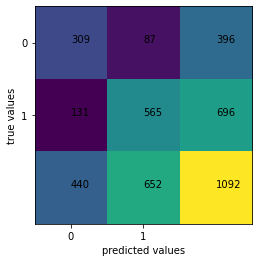

In [46]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.xticks([0,1])
plt.yticks([0,1])
plt.show()

In [47]:
#classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.780303,0.702273,0.739234,440.000000
female,0.811782,0.866564,0.838279,652.000000
accuracy,0.800366,0.800366,0.800366,0.800366
macro avg,0.796042,0.784419,0.788757,1092.000000
weighted avg,0.799098,0.800366,0.798371,1092.000000


In [48]:
#kappa mode
metrics.cohen_kappa_score(y_test,y_pred)

0.5782379454035207

In [49]:
import pickle

In [50]:
pickle.dump(model_best,open('model/model_svm.pickle','wb'))

In [51]:
pickle.dump(mean,open('model/mean_preprocess.pickle','wb'))